In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Data Manipulation for supervised learning problems


I would like to start with the most basic model imaginable possible which is ordinary least squares regression. Since we have time series data a necessary step before fitting the model is to process the data in a way such that we have a supervised learning problem. We do that by shifting the whole data set by one time-step. Repeating this five times yields a data set that have containts the information of the last five time steps which then can be used to predict the energy output of the current time step.

In [2]:
# getting familiar with the pandas shift function

# create a dataframe
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))

# create new columns that are the shifted version of the columns
n_shifts = [1, 2, 3, 4, 5]

for i, column in enumerate(df.columns):
    for i in n_shifts:
        df[f'{column}_shift_{i}'] = df[column].shift(i)

df.head()

,A,B,C,D,A_shift_1,A_shift_2,A_shift_3,A_shift_4,A_shift_5,B_shift_1,...,C_shift_1,C_shift_2,C_shift_3,C_shift_4,C_shift_5,D_shift_1,D_shift_2,D_shift_3,D_shift_4,D_shift_5
2000-01-01,-0.617080,0.223421,-0.975132,0.021192,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,-2.474682,0.677790,-0.314451,-0.764414,-0.617080,NaN,NaN,NaN,NaN,0.223421,...,-0.975132,NaN,NaN,NaN,NaN,0.021192,NaN,NaN,NaN,NaN
2000-01-03,-0.499371,-0.861640,-0.102305,0.210128,-2.474682,-0.617080,NaN,NaN,NaN,0.677790,...,-0.314451,-0.975132,NaN,NaN,NaN,-0.764414,0.021192,NaN,NaN,NaN
2000-01-04,2.096392,0.135167,0.092765,-0.954803,-0.499371,-2.474682,-0.617080,NaN,NaN,-0.861640,...,-0.102305,-0.314451,-0.975132,NaN,NaN,0.210128,-0.764414,0.021192,NaN,NaN
2000-01-05,1.019169,-0.618655,1.509004,-1.821343,2.096392,-0.499371,-2.474682,-0.61708,NaN,0.135167,...,0.092765,-0.102305,-0.314451,-0.975132,NaN,-0.954803,0.210128,-0.764414,0.021192,NaN


In [3]:
# load the data
turbine_two = pd.read_csv('../data/cleaned/turbine_two.csv')

# use date column as index
turbine_two.set_index('Date', inplace=True)

In [4]:
# create shifts of the data 
n_shifts = [1, 2, 3, 4, 5]

for column in turbine_two.columns:
    for i in n_shifts:
        turbine_two[f'{column} (time {-i})'] = turbine_two[column].shift(i)

In [5]:
# drop the rows with NaN values as they are not useful
turbine_two.dropna(inplace=True)
turbine_two.head()

,Wind speed (m/s),Wind direction (°),Nacelle position (°),Energy Export (kWh),Power (kW),Nacelle ambient temperature (°C),Rotor speed (RPM),Wind speed (m/s) (time -1),Wind speed (m/s) (time -2),Wind speed (m/s) (time -3),...,Nacelle ambient temperature (°C) (time -1),Nacelle ambient temperature (°C) (time -2),Nacelle ambient temperature (°C) (time -3),Nacelle ambient temperature (°C) (time -4),Nacelle ambient temperature (°C) (time -5),Rotor speed (RPM) (time -1),Rotor speed (RPM) (time -2),Rotor speed (RPM) (time -3),Rotor speed (RPM) (time -4),Rotor speed (RPM) (time -5)
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 10:40:00,5.657807,271.447266,274.899811,50.0,394.898346,11.500,10.659193,5.006634,4.905113,5.723492,...,11.955,11.700,11.655,11.305,10.835,9.273199,9.650973,11.043722,10.031982,12.381912
2016-05-03 10:50:00,4.163436,276.309357,259.268005,49.0,173.334015,12.405,8.994538,5.657807,5.006634,4.905113,...,11.500,11.955,11.700,11.655,11.305,10.659193,9.273199,9.650973,11.043722,10.031982
2016-05-03 11:00:00,4.431150,279.650452,279.763702,26.0,149.254593,11.905,8.744345,4.163436,5.657807,5.006634,...,12.405,11.500,11.955,11.700,11.655,8.994538,10.659193,9.273199,9.650973,11.043722
2016-05-03 11:10:00,5.683527,292.041290,292.092682,48.0,318.482910,11.845,10.005468,4.431150,4.163436,5.657807,...,11.905,12.405,11.500,11.955,11.700,8.744345,8.994538,10.659193,9.273199,9.650973
2016-05-03 11:20:00,5.770829,278.363129,294.390991,42.0,356.606689,11.985,10.284972,5.683527,4.431150,4.163436,...,11.845,11.905,12.405,11.500,11.955,10.005468,8.744345,8.994538,10.659193,9.273199


In [6]:
# center the data around the mean except for the target column (Power (kW))
for column in turbine_two.columns:
    if column != 'Power (kW)':
        turbine_two[column] = turbine_two[column] - turbine_two[column].mean()

# 2. Linear Regression

In [7]:
# imports for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error


In [8]:
# create X and y
X = turbine_two.drop('Power (kW)', axis=1)
y = turbine_two['Power (kW)']

# drop data of current time step
X = X.drop(X.columns[:6], axis=1)


# split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # shuffle=False because we want to keep the time aspect
X.head()

,Wind speed (m/s) (time -1),Wind speed (m/s) (time -2),Wind speed (m/s) (time -3),Wind speed (m/s) (time -4),Wind speed (m/s) (time -5),Wind direction (°) (time -1),Wind direction (°) (time -2),Wind direction (°) (time -3),Wind direction (°) (time -4),Wind direction (°) (time -5),...,Nacelle ambient temperature (°C) (time -1),Nacelle ambient temperature (°C) (time -2),Nacelle ambient temperature (°C) (time -3),Nacelle ambient temperature (°C) (time -4),Nacelle ambient temperature (°C) (time -5),Rotor speed (RPM) (time -1),Rotor speed (RPM) (time -2),Rotor speed (RPM) (time -3),Rotor speed (RPM) (time -4),Rotor speed (RPM) (time -5)
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 10:40:00,-1.423172,-1.524739,-0.706421,-1.372172,0.422191,83.173524,88.219330,71.278788,70.234056,62.452762,...,0.455168,0.199864,0.154531,-0.195805,-0.666124,-1.583870,-1.206081,0.186981,-0.824178,1.526430
2016-05-03 10:50:00,-0.772000,-1.423218,-1.524800,-0.706486,-1.372328,71.101777,83.172882,88.218455,71.282427,70.237277,...,0.000168,0.454864,0.199531,0.154194,-0.196124,-0.197876,-1.583856,-1.205768,0.187561,-0.823500
2016-05-03 11:00:00,-2.266371,-0.772046,-1.423279,-1.524865,-0.706642,75.963868,71.101135,83.172007,88.222094,71.285647,...,0.905168,-0.000136,0.454531,0.199194,0.153875,-1.862531,-0.197862,-1.583542,-1.205188,0.188239
2016-05-03 11:10:00,-1.998656,-2.266417,-0.772107,-1.423344,-1.525021,79.304963,75.963226,71.100260,83.175646,88.225314,...,0.405168,0.904864,-0.000469,0.454194,0.198875,-2.112725,-1.862516,-0.197548,-1.582962,-1.204509
2016-05-03 11:20:00,-0.746279,-1.998703,-2.266478,-0.772171,-1.423500,91.695802,79.304321,75.962351,71.103899,83.178866,...,0.345168,0.404864,0.904531,-0.000806,0.453876,-0.851601,-2.112710,-1.862203,-0.196968,-1.582284


In [9]:
# create the model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# make predictions
y_pred = lr.predict(X_test)

# calculate the mae, the mean squared error and rmse
mae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')



MSE: 20715.851542708617
RMSE: 143.9300230761762
MAE: 53.21466564222192


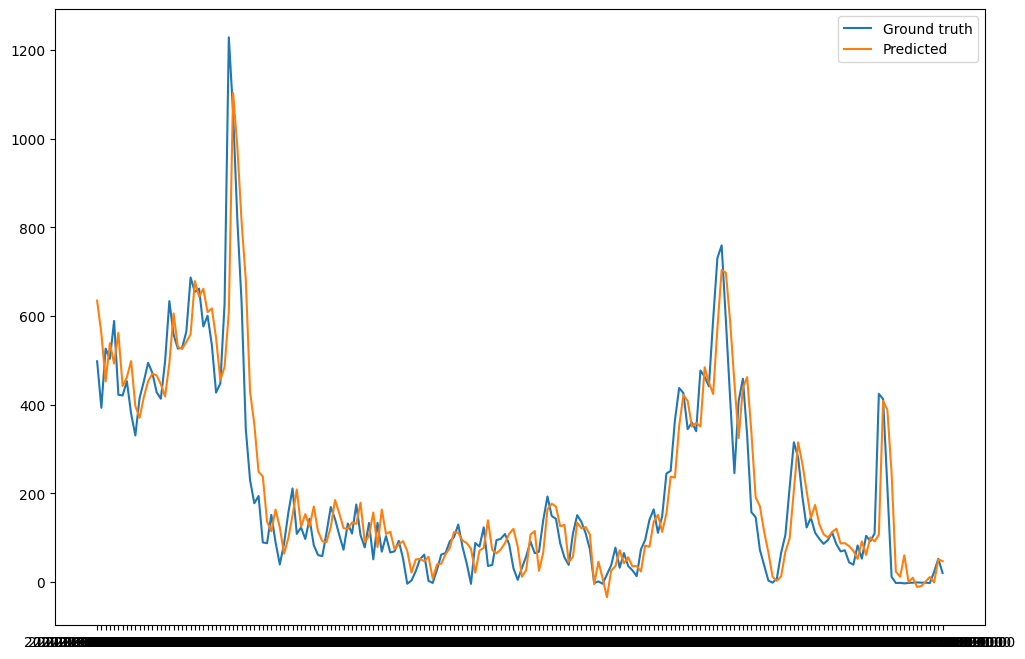

In [10]:
# plot predictions vs actual values
plt.figure(figsize=(12, 8))
plt.plot(y_test[:200], label='Ground truth')
plt.plot(y_pred[:200], label='Predicted')

plt.xticks([])

plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.title('Linear Regression')

plt.legend()
plt.show()

**Analysis:** It seems like linear regression just shifts the curve one time-step to the right. So the question arises if it is even better than the most basic model imaginable, i.e. outputting the value of the time-step before. In the following we look if such a model

In [11]:
# errors of most basic model
mse = mean_squared_error(turbine_two['Power (kW)'], turbine_two['Power (kW) (time -1)'])
rmse = np.sqrt(mse)
mae = median_absolute_error(turbine_two['Power (kW)'], turbine_two['Power (kW) (time -1)'])

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 502663.45128320577
RMSE: 708.9876242101873
MAE: 691.9110269984898


Good for us: this is not the case. Doing a linear regression on the data reduces the error by a large amount. Thus we keep linear regression as our baseline model.

# 2. Gaussian Process

A Gaussian Process have the advantage that it gives us additionally an uncertainty estimate.

In [12]:
### WARNING: this crashes the kernel since we have too many data points --> use itergp instead to approximate the Gaussian Process

# imports for Gaussian Process
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF

# We can use the same X and y as before
# create the model
# gp = GaussianProcessRegressor(kernel=RBF())

# # fit the model
# gp.fit(X_train, y_train)
# print("fitting done")

# # make predictions
# y_pred = gp.predict(X_test)

# # calculate the mae, the mean squared error and rmse
# mae = median_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print(f'MSE: {mse}')
# print(f'RMSE: {rmse}')
# print(f'MAE: {mae}')
